Initial setup

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import wosis
import pandas as pd
import metaknowledge as mk

# Helper functions for plotting
import wosis.analysis.plotting as wos_plot

# Analysis and search functions
from wosis.analysis import (preview_matches, search_records, keyword_matches, 
                            find_pubs_by_authors, preview_matches_by_keyword, get_unique_kw_titles,
                            remove_by_journals, remove_by_title)

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This just helps make the plots look nicer
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2.0)

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
RC = mk.RecordCollection("tmp/rest_requested_corpora.txt")
corpora_df = wosis.rc_to_df(RC)

In [4]:
wos_config = wosis.load_config('config.yml')

Searching for active subspace methods, plotting keyword and publication trend

In [5]:
active = wosis.keyword_matches(RC, ['active subspace', 'activity scores'], threshold=95.0)

In [6]:
all_active = active.combine_recs()

In [40]:
act_df = wosis.rc_to_df(all_active)
act_df.to_csv('../data/active_subspaces_papers.csv')

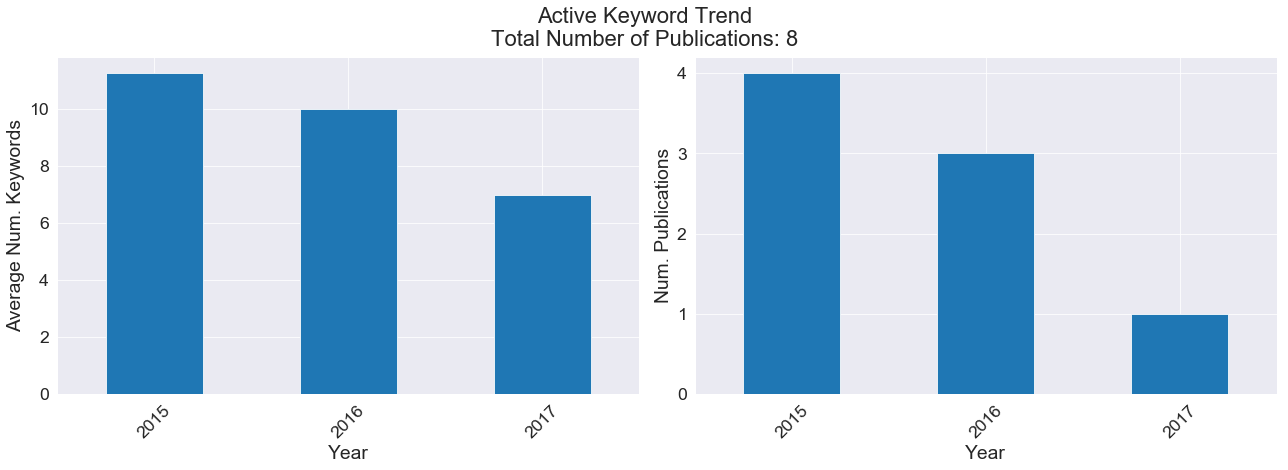

In [7]:
wos_plot.plot_kw_trend(all_active, title='Active Keyword Trend', save_plot_fn='figs/active_kw_trend.png')

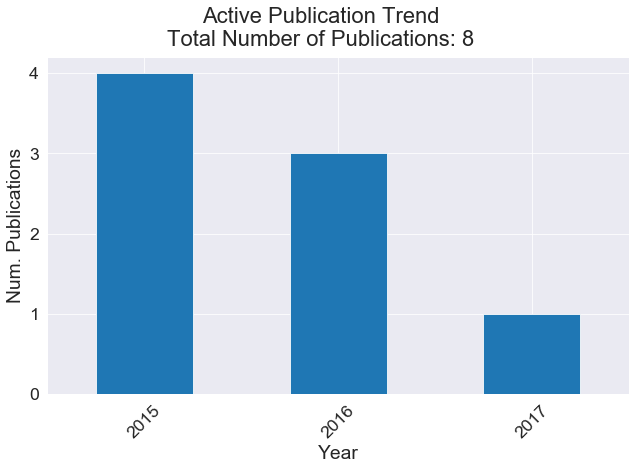

In [8]:
wos_plot.plot_pub_trend(all_active, title='Active Publication Trend', save_plot_fn='figs/active_pub_trend.png')

<hr> Topic trend (active subspaces)

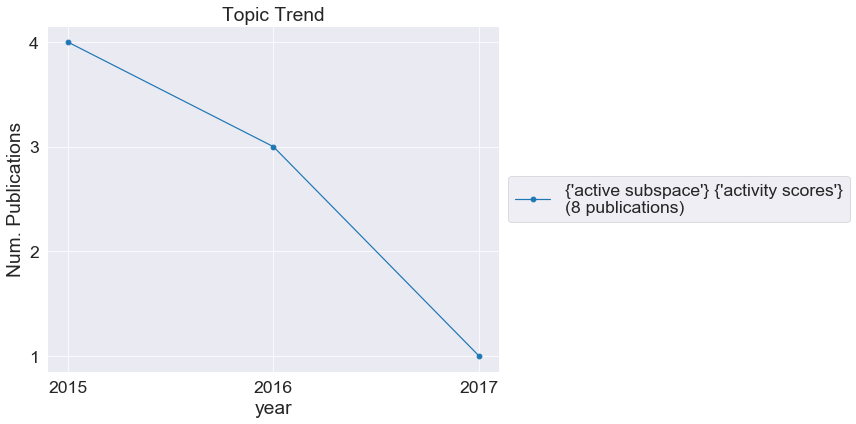

In [9]:
wos_plot.plot_topic_trend([all_active], save_plot_fn='figs/samp_topic_trend.png')

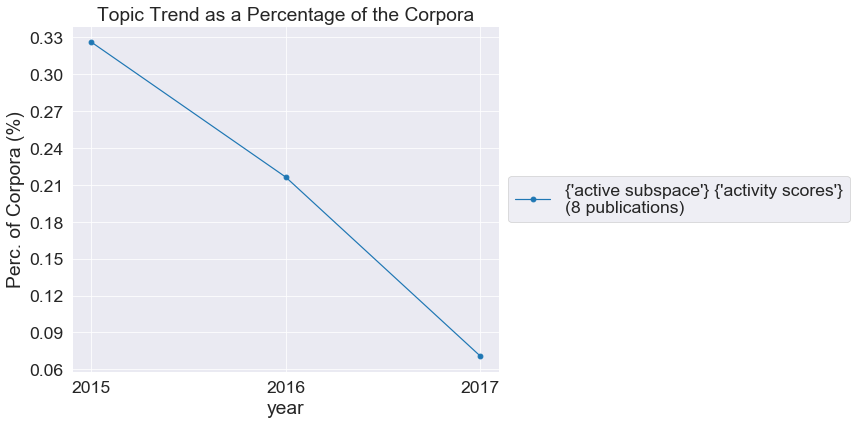

In [10]:
wos_plot.plot_topic_trend([all_active], total_rc=RC, title='Topic Trend as a Percentage of the Corpora', save_plot_fn='figs/active_topic_trend_percentage.png')

Searching for variogram methods, plotting keyword and publication trend

In [35]:
var = wosis.keyword_matches(RC, ['variogram sensitivity', 'variogram analysis', 'analysis with variogram', 'analysis variogram', 'variogram-based'], threshold=100.0)

In [36]:
all_var = var.combine_recs()

In [37]:
var_df = wosis.rc_to_df(all_var)
var_df.to_csv('../data/variogram_papers.csv')

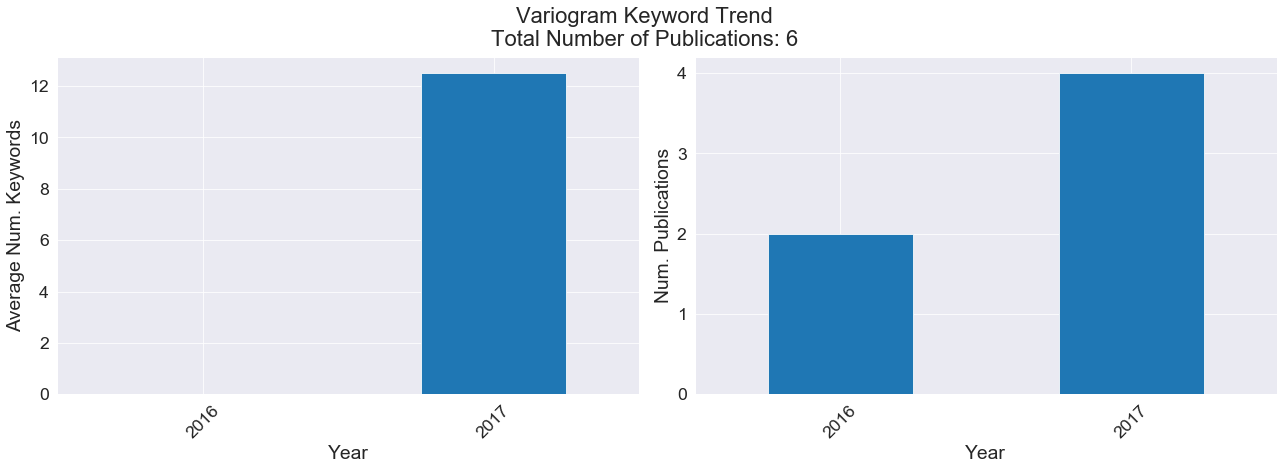

In [38]:
wos_plot.plot_kw_trend(all_var, title='Variogram Keyword Trend', save_plot_fn='figs/var_kw_trend.png')

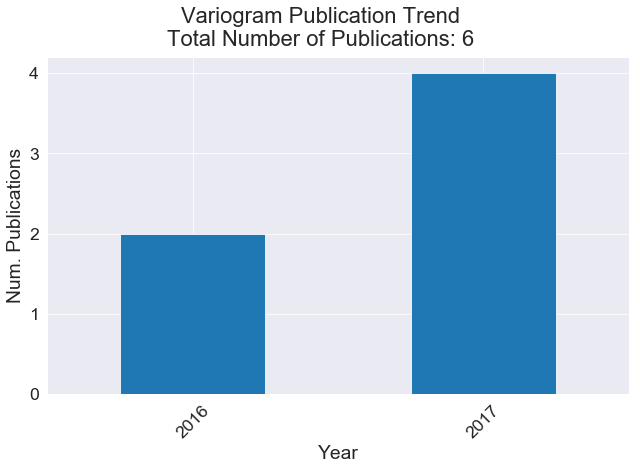

In [39]:
wos_plot.plot_pub_trend(all_var, title='Variogram Publication Trend', save_plot_fn='figs/var_pub_trend.png')

<hr> Topic trend (variogram methods)

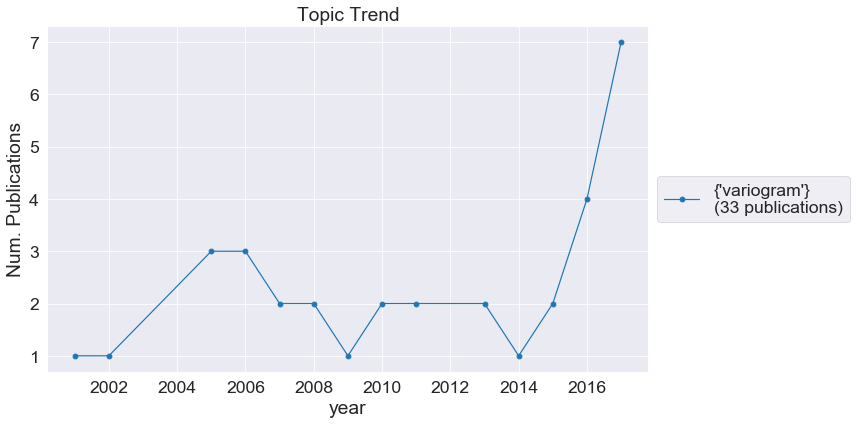

In [32]:
wos_plot.plot_topic_trend([all_var], save_plot_fn='figs/var_topic_trend.png')

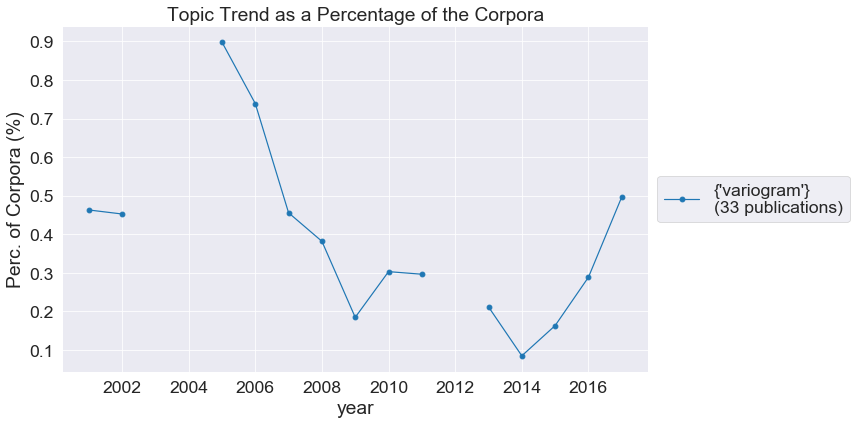

In [33]:
wos_plot.plot_topic_trend([all_var], total_rc=RC, title='Topic Trend as a Percentage of the Corpora', save_plot_fn='figs/var_topic_trend_percentage.png')